In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
#simulation of 40 data points
np.random.seed(1)
X = np.r_[np.random.randn(20, 2) - [1.5, 1.5], 
          np.random.randn(20, 2) + [1.5, 1.5]]
Y = [0] * 20 + [1] * 20

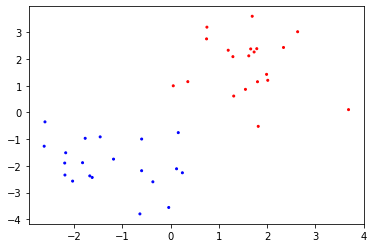

In [19]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap='bwr',s=4)

In [3]:
def plot_svm_linear(X, Y, penalty):
    #fit the model
    fignum = 1
    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    #get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    #get the margin and the parallels
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    lower = yy - np.sqrt(1 + a ** 2) * margin
    upper = yy + np.sqrt(1 + a ** 2) * margin

    #plot the separating plane and the parallels
    plt.figure(fignum, figsize=(4, 4))
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, lower, 'k--')
    plt.plot(xx, upper, 'k--')

    #plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=5, cmap='bwr',
                edgecolors='k')
    #mark the support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=20, edgecolors='k')

    plt.axis('tight')
    plt.xlim(-4.5, 4.5)
    plt.ylim(-4.5, 4.5)
    
    fignum = fignum + 1

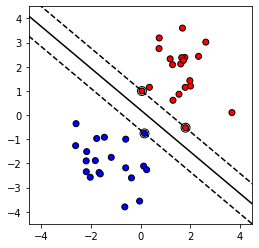

In [5]:
plot_svm_linear(X, Y, 1000)
plt.savefig('linear_1.png', transparent=True, dpi=200)
#plt.clf()

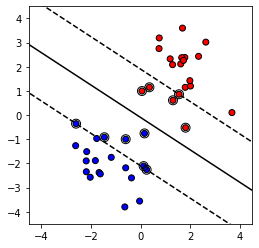

In [6]:
plot_svm_linear(X, Y, 0.05)
plt.savefig('linear_0.05.png', transparent=True, dpi=200)
#plt.clf()